# extract structure from example dump file

In [7]:
import json
import pandas as pd
# jq . -c linux_clean_formatted.json  > linux_clean_formatted_compact.json

identifier_field = "_id"
type_field = "_type"
known_fields = [identifier_field,type_field]

def load_data(fname):
    
    # one dataframe per type with objects
    type_frames = {}
    
    # set of fields per type
    type_fields = {}
    
    with open(fname) as fi:
        for li in fi:
            node_data = json.loads(li)
            
            type_name = node_data[type_field]
            id_value = node_data[identifier_field]
            
            for fn in node_data :
                if fn not in known_fields:
                    fv = node_data[fn]
                    # value of the field in a type, now can we train on that?
                    
                    # count the structure of the fields
                    if type_name not in type_fields:
                        type_fields[type_name] = {}
                        
                    if fn not in type_fields[type_name]:
                        type_fields[type_name][fn] = 1
                    else:
                        type_fields[type_name][fn] = type_fields[type_name][fn] + 1
            
            if type_name not in type_frames :
                type_frames[type_name] = {}
            type_frames[type_name][id_value] = node_data
    return (type_fields, type_frames)

# now we can train 

In [8]:
(type_fields, type_frames) = load_data("linux_clean_formatted_compact.json")



In [9]:
type_fields

{'type_decl': {'name': 423,
  'type': 1080,
  'chain': 1077,
  'srcp': 1029,
  'scpe': 1028},
 'identifier_node': {'_string': 8177, '_string_len': 8177},
 'integer_type': {'name': 270,
  'size': 360,
  'algn': 360,
  'prec': 360,
  'sign': 360,
  'min': 359,
  'max': 358,
  'unql': 251,
  'qual': 31},
 'integer_cst': {'type': 1103, 'value': 1103},
 'real_type': {'name': 13,
  'size': 13,
  'algn': 13,
  'prec': 13,
  'qual': 2,
  'unql': 2},
 'complex_type': {'name': 9, 'size': 9, 'algn': 9},
 'void_type': {'name': 5, 'algn': 5, 'qual': 3, 'unql': 4},
 'array_type': {'name': 6,
  'unql': 70,
  'size': 221,
  'algn': 237,
  'elts': 237,
  'domn': 231},
 'record_type': {'name': 474,
  'size': 536,
  'algn': 584,
  'tag': 584,
  'flds': 535,
  'unql': 142,
  'qual': 51},
 'pointer_type': {'name': 39,
  'size': 1008,
  'algn': 1008,
  'ptd': 1008,
  'unql': 124,
  'qual': 86},
 'field_decl': {'name': 2543,
  'type': 2620,
  'scpe': 2620,
  'srcp': 2620,
  'chain': 2144,
  'size': 2602,
  '

In [12]:
data_frames_pd = {}
for type_name in type_fields:
    df = pd.DataFrame.from_dict(type_frames[type_name], columns=type_fields[type_name].keys(), orient='index')
    data_frames_pd[type_name]= df

In [13]:
data_frames_pd['integer_cst']

,type,value
5,11,32
6,3,-2147483648
7,3,2147483647
12,11,8
13,9,-128
...,...,...
44734,17229,0
44868,44876,0
44895,26,-2
44910,26,-16


In [27]:
# now lets one hot encode all the fields
from sklearn.preprocessing import LabelBinarizer
data_fields = {}
skip = {"constructor": {"idx" : 1, "val": 1}}
for type_name in type_fields:
    data_fields[type_name]={}
    for field_name in type_fields[type_name].keys():
        
        encoder = LabelBinarizer()
        values = data_frames_pd[type_name][field_name].fillna("NAN")
        print(type_name, field_name)
        if type_name in skip:
            if field_name in skip[type_name]:
                continue # skip
        encoder.fit(values)
        
        data_fields[type_name][field_name] = encoder
    #list(y_encoder.classes_)

type_decl name
type_decl type
type_decl chain
type_decl srcp
type_decl scpe
identifier_node _string
identifier_node _string_len
integer_type name
integer_type size
integer_type algn
integer_type prec
integer_type sign
integer_type min
integer_type max
integer_type unql
integer_type qual
integer_cst type
integer_cst value
real_type name
real_type size
real_type algn
real_type prec
real_type qual
real_type unql
complex_type name
complex_type size
complex_type algn
void_type name
void_type algn
void_type qual
void_type unql
array_type name
array_type unql
array_type size
array_type algn
array_type elts
array_type domn
record_type name
record_type size
record_type algn
record_type tag
record_type flds
record_type unql
record_type qual
pointer_type name
pointer_type size
pointer_type algn
pointer_type ptd
pointer_type unql
pointer_type qual
field_decl name
field_decl type
field_decl scpe
field_decl srcp
field_decl chain
field_decl size
field_decl algn
field_decl bpos
function_decl name
func

In [31]:

for dt in data_fields:
    for ft in data_fields[dt]:
        print(dt, ft, data_fields[dt][ft].classes_)


type_decl name ['100' '10032' '1012' '10165' '1027' '103' '1031' '1043' '1047' '10483'
 '10568' '106' '1060' '1072' '1078' '1089' '109' '1098' '1103' '1114'
 '1119' '112' '1125' '1128' '1137' '1140' '1147' '115' '1150' '1160'
 '1162' '11644' '1169' '1178' '118' '1185' '121' '1211' '125' '128' '131'
 '1314' '135' '1350' '1379' '138' '1390' '1397' '141' '1414' '1433' '144'
 '1454' '147' '1476' '1499' '15' '150' '1513' '153' '15362' '1537' '15396'
 '15429' '15458' '15493' '15530' '15575' '1560' '160' '1600' '1618' '1628'
 '1644' '1655' '166' '1668' '1675' '1684' '1689' '169' '16932' '1699'
 '1705' '1715' '1725' '1735' '1743' '17491' '1755' '1763' '17722' '1774'
 '17796' '1782' '17877' '1791' '1799' '1807' '1815' '1823' '18258' '1831'
 '18348' '1839' '1847' '18529' '1855' '1863' '1871' '1879' '1894' '1905'
 '1912' '1923' '1930' '1942' '1949' '1960' '1966' '1976' '2' '20132'
 '2032' '2037' '2046' '2051' '2060' '2067' '20696' '2076' '20827' '2083'
 '20875' '2092' '2099' '2107' '2115' '2123' 

parm_decl size ['12' '22' '5' '58']
parm_decl algn [ 8 16 32 64]
parm_decl used ['1']
parm_decl chain ['10059' '10605' '10650' '10686' '10692' '10726' '10886' '10932' '10946'
 '10982' '11015' '11051' '11079' '11119' '11142' '11195' '11447' '11479'
 '11599' '11647' '11759' '11867' '11998' '12027' '12069' '12087' '12148'
 '12150' '12238' '12764' '12827' '14404' '17184' '17267' '17451' '17617'
 '17697' '17700' '17775' '17778' '17854' '17856' '17904' '17941' '17942'
 '17987' '18025' '18028' '18110' '18498' '18581' '20135' '20460' '20525'
 '20527' '20597' '21156' '21191' '21396' '21439' '21537' '21607' '21683'
 '21767' '21854' '21856' '21893' '21945' '22432' '2252' '2267' '2271'
 '2284' '23064' '23130' '2484' '2496' '2511' '2514' '2527' '2543' '2557'
 '2591' '2622' '26405' '26448' '26489' '26533' '2661' '2686' '2705' '2727'
 '2731' '2755' '2778' '2780' '2830' '2835' '28381' '28415' '2882' '28860'
 '28902' '28948' '2911' '29215' '29345' '29371' '29374' '29405' '29408'
 '29458' '29461' '29529

statement_list E86 ['19906' 'NAN']
statement_list E87 ['19907' 'NAN']
statement_list E88 ['19908' 'NAN']
statement_list E89 ['19909' 'NAN']
statement_list E90 ['19910' 'NAN']
statement_list E91 ['19911' 'NAN']
statement_list E92 ['19912' 'NAN']
statement_list E93 ['19913' 'NAN']
statement_list E94 ['19914' 'NAN']
statement_list E95 ['19915' 'NAN']
statement_list E96 ['19916' 'NAN']
statement_list E97 ['19917' 'NAN']
switch_expr type ['2038' '2068' '3' '31']
switch_expr cond ['10336' '19587' '2271' '2284' '40726' '41168' '41459']
switch_expr body ['12135' '19758' '2287' '2301' '40727' '41169' '41460']
label_expr type ['151']
label_expr name ['11053' '11054' '11066' '12037' '12046' '12136' '12186' '12195' '2288'
 '2302' '29484' '29485' '29490' '29545' '29546' '29553' '30126' '30127'
 '30134' '30744' '30745' '30753' '30763' '30764' '30770' '30772' '31144'
 '31145' '31163' '31177' '31178' '31184' '31195' '31196' '31200' '31322'
 '31323' '31330' '31468' '31469' '31476' '31480' '31481' '3148

In [34]:
# now what are the types behind each of those ids?
id_to_type = {}

for x in type_frames:
    for y in type_frames[x]:
        id_to_type[y]=x
       

In [47]:
# map the fields into types 
# create a list of fields as well

all_fields = {}

data_fields_types = {}
for dt in data_fields:
    data_fields_types[dt] ={}
    
    for ft in data_fields[dt]:
        data_fields_types[dt][ft] = {}
        
        # just tag them
        all_fields[ft]= ft
        
        for to_id in data_fields[dt][ft].classes_:
            if to_id in id_to_type:
                to_type = id_to_type[to_id]
                if to_type not in data_fields_types[dt][ft]:
                    data_fields_types[dt][ft][to_type] = 1
                else:
                    data_fields_types[dt][ft][to_type] = data_fields_types[dt][ft][to_type] + 1
                    

In [36]:
data_fields_types

{'type_decl': {'name': {'identifier_node': 422},
  'type': {'pointer_type': 39,
   'record_type': 533,
   'real_type': 11,
   'integer_type': 234,
   'enumeral_type': 139,
   'union_type': 87,
   'complex_type': 9,
   'void_type': 2,
   'array_type': 6,
   'function_type': 6,
   'boolean_type': 1},
  'chain': {'type_decl': 888,
   'const_decl': 133,
   'function_decl': 45,
   'var_decl': 11},
  'srcp': {},
  'scpe': {'function_decl': 11, 'translation_unit_decl': 1}},
 'identifier_node': {'_string': {}, '_string_len': {}},
 'integer_type': {'name': {'type_decl': 234, 'identifier_node': 2},
  'size': {'integer_cst': 5},
  'algn': {},
  'prec': {},
  'sign': {},
  'min': {'integer_cst': 33},
  'max': {'integer_cst': 103},
  'unql': {'integer_type': 15},
  'qual': {}},
 'integer_cst': {'type': {'integer_type': 48,
   'pointer_type': 52,
   'enumeral_type': 8,
   'boolean_type': 1},
  'value': {'type_decl': 79,
   'identifier_node': 161,
   'parm_decl': 4,
   'bind_expr': 4,
   'return_expr

In [49]:
# now we have an idea of the structure of the graph
# some are very simple, others are complex. we want to learn now say if if the type or the fieldname will determine the other type 

# so now we one hot encode the types and fields 
field_encoder = LabelBinarizer()

all_fields_values = pd.DataFrame.from_dict(all_fields, orient="index")

In [50]:
field_encoder.fit(all_fields_values)

LabelBinarizer()

In [51]:
field_encoder.classes_

array(['E0', 'E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17',
       'E18', 'E19', 'E2', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25',
       'E26', 'E27', 'E28', 'E29', 'E3', 'E30', 'E31', 'E32', 'E33',
       'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E4', 'E40', 'E41',
       'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49', 'E5',
       'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58',
       'E59', 'E6', 'E60', 'E61', 'E62', 'E63', 'E64', 'E65', 'E66',
       'E67', 'E68', 'E69', 'E7', 'E70', 'E71', 'E72', 'E73', 'E74',
       'E75', 'E76', 'E77', 'E78', 'E79', 'E8', 'E80', 'E81', 'E82',
       'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E9', 'E90',
       'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'OP0 :', 'OP1',
       'OP2', '_string', '_string_len', 'algn', 'args', 'argt', 'body',
       'bpos', 'chain', 'chan', 'cnst', 'cond', 'csts', 'decl', 'domn',
       'elts', 'expr', 'flds', 'fn', 'init', 'labl', 'link', 'low', 'max',
       'min'

In [52]:
type_encoder = LabelBinarizer()
type_name_values = pd.DataFrame.from_dict({ k:k for k in data_fields_types}, orient="index")
type_encoder.fit(type_name_values)

LabelBinarizer()

In [53]:
type_encoder.classes_

array(['addr_expr', 'array_ref', 'array_type', 'asm_expr', 'bind_expr',
       'bit_and_expr', 'bit_field_ref', 'bit_ior_expr', 'bit_not_expr',
       'bit_xor_expr', 'boolean_type', 'call_expr', 'case_label_expr',
       'complex_type', 'component_ref', 'compound_expr',
       'compound_literal_expr', 'cond_expr', 'const_decl', 'constructor',
       'convert_expr', 'decl_expr', 'enumeral_type', 'eq_expr',
       'field_decl', 'float_expr', 'function_decl', 'function_type',
       'ge_expr', 'goto_expr', 'gt_expr', 'identifier_node',
       'indirect_ref', 'integer_cst', 'integer_type', 'label_decl',
       'label_expr', 'le_expr', 'lrotate_expr', 'lshift_expr', 'lt_expr',
       'max_expr', 'min_expr', 'minus_expr', 'modify_expr', 'mult_expr',
       'ne_expr', 'negate_expr', 'nop_expr', 'parm_decl', 'plus_expr',
       'pointer_bounds_type', 'pointer_plus_expr', 'pointer_type',
       'postdecrement_expr', 'postincrement_expr', 'predecrement_expr',
       'predict_expr', 'preincremen

In [71]:
# now we have the type and field encoded, we can create a dataset on fromtype, field, totype, all encoded
X_array = []
X_array2 = []
Y_array = []

for from_type in data_fields_types:
    from_enc = type_encoder.transform([from_type])[0]
    
    for field in data_fields_types[from_type]:
        #print(from_type, field)
        field_enc = field_encoder.transform([field])[0]
        #from_to_tuples.append([from_enc])
        
        #print(from_enc, field_enc)
        for totype in data_fields_types[from_type][field]:
            to_type_enc = type_encoder.transform([to_type])[0]
            row = from_enc
            #row.extend(field_enc)
            
            X_array.append(row)
            X_array2.append(field_enc)
            Y_array.append(to_type_enc)
    

In [72]:
X = pd.DataFrame(X_array)
X2 = pd.DataFrame(X_array2)
Y = pd.DataFrame(Y_array)

In [73]:
XX = pd.concat([X,X2],axis=1)


In [74]:
XX.size

275770

In [75]:
X2.size

175054

In [76]:
X.size

100716

In [80]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
model2 = Sequential()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    XX, Y, random_state=42
)
n_cols = XX.shape[1]
o_cols = Y.shape[1]
model2.add(Dense(500, activation='relu',input_shape=(n_cols,)))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(o_cols, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam')

In [81]:
 model2.fit(X_train, y_train, verbose=10, batch_size=1)
    

Epoch 1/1


In [82]:
model2.evaluate(X_test, y_test, verbose=10)

3.492353496161134e-05

In [83]:
print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 500)               115500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_5 (Dense)              (None, 84)                8484      
Total params: 174,084
Trainable params: 174,084
Non-trainable params: 0
_________________________________________________________________
None


In [84]:
help(model2)

Help on Sequential in module keras.engine.sequential object:

class Sequential(keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  # Arguments
 |      layers: list of layers to add to the model.
 |      name: Name given to the model
 |  
 |  # Example
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model

In [87]:
help(model2.get_layer(index=2))

Help on Dense in module keras.layers.core object:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: if the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  # Example
 |  
 |  ```python
 |      # as first layer in a sequential model:
 |      model = Sequential()
 

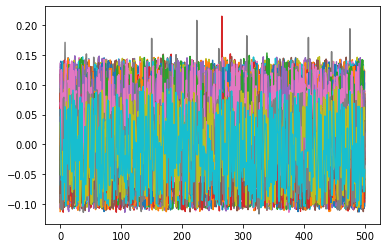

In [96]:
import matplotlib.pyplot as plt
f = plt.plot(model2.get_layer(index=1).get_weights()[0])


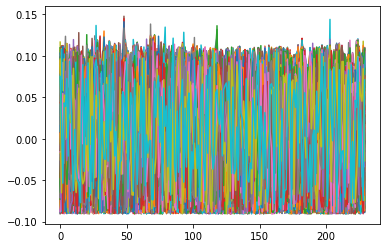

In [97]:
f = plt.plot(model2.get_layer(index=0).get_weights()[0])

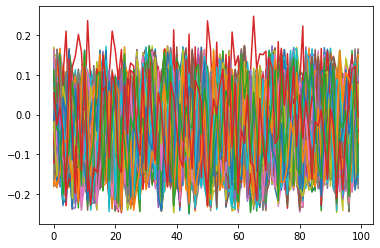

In [98]:
f = plt.plot(model2.get_layer(index=2).get_weights()[0])

In [99]:
model2.save("first_model")